In [120]:
import pandas as pd
import numpy as np
pak = pd.read_csv("pakwheels.csv")
pak.shape

(89956, 17)

In [121]:
pak.describe()

,Unnamed: 0,model_year
count,89956.000000,87449.000000
mean,44977.500000,2012.861576
std,25968.204745,7.669485
min,0.000000,1990.000000
25%,22488.750000,2007.000000
50%,44977.500000,2015.000000
75%,67466.250000,2019.000000
max,89955.000000,2022.000000


In [122]:
# This Discription is wrong.

In [123]:
pak.columns

Index(['Unnamed: 0', 'ad_url', 'title', 'location', 'model_year', 'price',
       'mileage', 'engine_type', 'transmission', 'registered_in', 'color',
       'assembly', 'engine_capacity', 'body_type', 'ad_last_updated',
       'car_features', 'description'],
      dtype='object')

In [124]:
# Need to change the Name of columns
pak.rename(columns={'Unnamed: 0' : 'ID', 'ad_url' : 'Ad_URL', 'title' : 'Title', 'location' : 'Location', 
                    'model_year' : 'Model Year', 'price' : 'Price','mileage' : 'Mileage', 'engine_type' : 'Engine Type',
                    'transmission' : 'Transmission', 'registered_in' : 'Registered City', 'color' : 'Color','assembly' : 'Assembly',
                    'engine_capacity' : 'Engine Capacity', 'body_type' : 'Body Type', 'ad_last_updated' : 'Last Updated',
                    'car_features' : 'Car Feature', 'description' : 'Description'}, inplace=True)

In [125]:
pak.columns

Index(['ID', 'Ad_URL', 'Title', 'Location', 'Model Year', 'Price', 'Mileage',
       'Engine Type', 'Transmission', 'Registered City', 'Color', 'Assembly',
       'Engine Capacity', 'Body Type', 'Last Updated', 'Car Feature',
       'Description'],
      dtype='object')

In [126]:
pak.dtypes

ID                   int64
Ad_URL              object
Title               object
Location            object
Model Year         float64
Price               object
Mileage             object
Engine Type         object
Transmission        object
Registered City     object
Color               object
Assembly            object
Engine Capacity     object
Body Type           object
Last Updated        object
Car Feature         object
Description         object
dtype: object

In [127]:
# Wrong data types of some values 

In [128]:
# Need to change the Data Type
pak['Model Year'] = pak['Model Year'].astype(float).astype('Int64')
# Price data conversion
def clean_price(value):
    if isinstance(value, str):
        value = value.replace('PKR', '').replace(',', '').strip().lower()

        if 'crore' in value:
            num = value.replace('crore', '').strip()
            return float(num) * 10000000
        elif 'lac' in value or 'lacs' in value:
            num = value.replace('lacs', '').replace('lac', '').strip()
            return float(num) * 100000
        else:
            try:
                return float(value)
            except:
                return np.nan
    else:
        return np.nan
pak['Price'] = pak['Price'].apply(clean_price)
pak['Price'] = pak['Price'].astype('float64')
# Mileage Data conversion
pak['Mileage'] = pak['Mileage'].astype(str)
pak['Mileage'] = (
    pak['Mileage']
    .str.replace('km', '', regex=False)   # remove 'km'
    .str.replace(',', '', regex=False)    # remove commas
    .str.strip()                          # remove spaces
)
pak['Mileage'] = pd.to_numeric(pak['Mileage'], errors='coerce').fillna(0).astype('Int64')
# Engine Capacity Data conversion 
pak['Engine Capacity'] = pak['Engine Capacity'].astype(str)
pak['Engine Capacity'] = (
    pak['Engine Capacity']
    .str.replace('cc', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)
pak['Engine Capacity'] = pd.to_numeric(pak['Engine Capacity'], errors='coerce').fillna(0).astype('Int64')
# Last Update Data conversion
pak['Last Updated'] = pak['Last Updated'].astype(str)
pak['Last Updated'] = pd.to_datetime(pak['Last Updated'], format='%b %d, %Y', errors='coerce')

In [129]:
pak.dtypes

ID                          int64
Ad_URL                     object
Title                      object
Location                   object
Model Year                  Int64
Price                     float64
Mileage                     Int64
Engine Type                object
Transmission               object
Registered City            object
Color                      object
Assembly                   object
Engine Capacity             Int64
Body Type                  object
Last Updated       datetime64[ns]
Car Feature                object
Description                object
dtype: object

In [130]:
missing =  pak.isnull().sum()

In [131]:
print(missing)

ID                    0
Ad_URL                0
Title                 0
Location              2
Model Year         2507
Price              1407
Mileage               0
Engine Type         955
Transmission          2
Registered City       2
Color              1863
Assembly              0
Engine Capacity       0
Body Type          8549
Last Updated          2
Car Feature        6521
Description           2
dtype: int64


In [132]:
missing_pct = pak.isnull().mean() * 100

In [133]:
print(missing_pct) # Percentage of Missing values in columns

ID                 0.000000
Ad_URL             0.000000
Title              0.000000
Location           0.002223
Model Year         2.786918
Price              1.564098
Mileage            0.000000
Engine Type        1.061630
Transmission       0.002223
Registered City    0.002223
Color              2.071012
Assembly           0.000000
Engine Capacity    0.000000
Body Type          9.503535
Last Updated       0.002223
Car Feature        7.249100
Description        0.002223
dtype: float64


In [134]:
#Location missing value handling
pak['Location'] = pak['Location'].fillna('Unkown')

In [135]:
pak['Model Year'].unique()

<IntegerArray>
[2007, 2012, 1995, 2013, 2015, 2011, 2018, 2020, 2006, 2016, 2014, 2022, 1994,
 2008, 2004, 2017, 2005, 2021, 2019, <NA>, 1999, 2003, 2000, 2009, 1998, 2001,
 2010, 2002, 1993, 1997, 1996, 1991, 1992, 1990]
Length: 34, dtype: Int64

In [136]:
median_year = pak['Model Year'].median()
pak['Model Year'] = pak['Model Year'].fillna(median_year)

In [137]:
mean_price = pak['Price'].median()
pak['Price'] = pak['Price'].fillna(mean_price)

In [138]:
pak['Engine Type'] = pak['Engine Type'].fillna('Unkown')

In [139]:
pak['Transmission'] = pak['Transmission'].fillna('Unkown')

In [140]:
pak['Registered City'] = pak['Registered City'].fillna('Unkown')

In [141]:
pak['Color'] = pak['Color'].fillna('Unkown')

In [142]:
pak['Body Type'] = pak['Body Type'].fillna('Unkown')

In [143]:
pak['Last Updated'] = pak['Last Updated'].fillna('Unkown')

In [144]:
pak['Car Feature'] = pak['Car Feature'].fillna('Unkown')

In [145]:
pak['Description'] = pak['Description'].fillna('Unkown')

In [146]:
mean_price = pak['Price'].median()
pak['Price'] = pak['Price'].fillna(mean_price)

In [147]:
missing_pct = pak.isnull().mean() * 100
print(missing_pct) # Percentage of Missing values in columns

ID                 0.0
Ad_URL             0.0
Title              0.0
Location           0.0
Model Year         0.0
Price              0.0
Mileage            0.0
Engine Type        0.0
Transmission       0.0
Registered City    0.0
Color              0.0
Assembly           0.0
Engine Capacity    0.0
Body Type          0.0
Last Updated       0.0
Car Feature        0.0
Description        0.0
dtype: float64


In [148]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

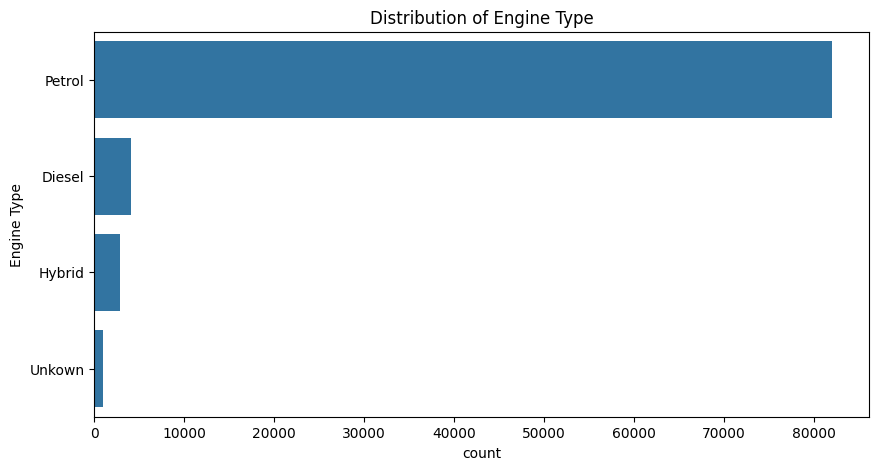

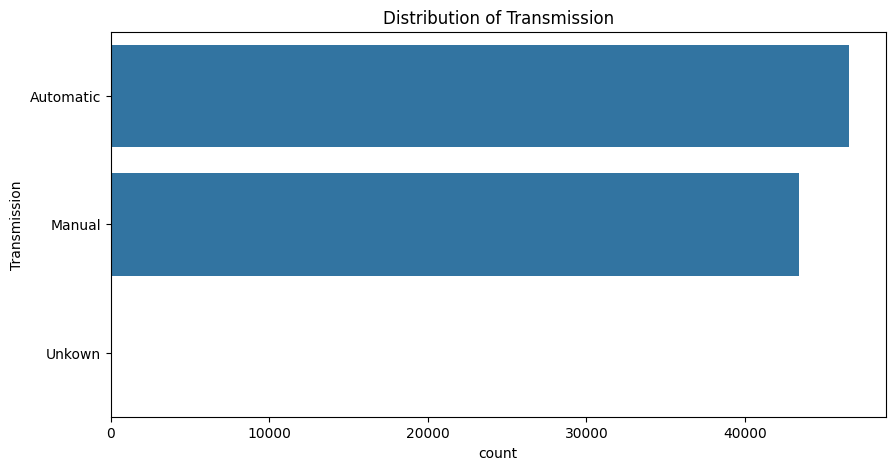

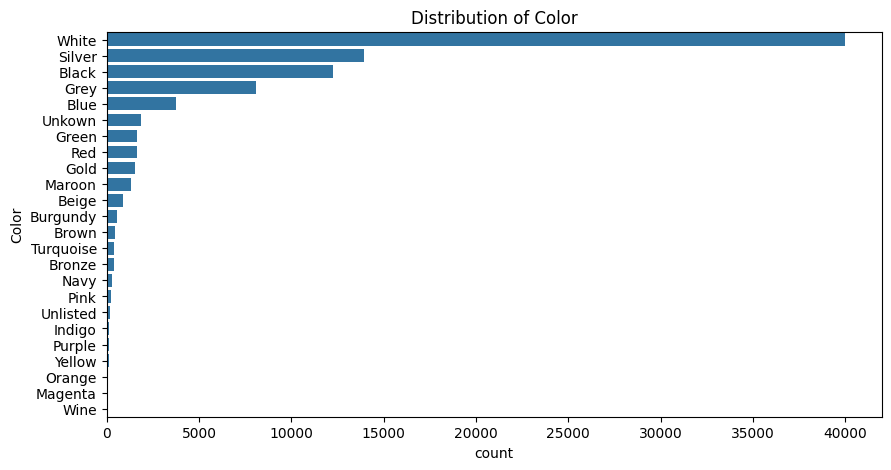

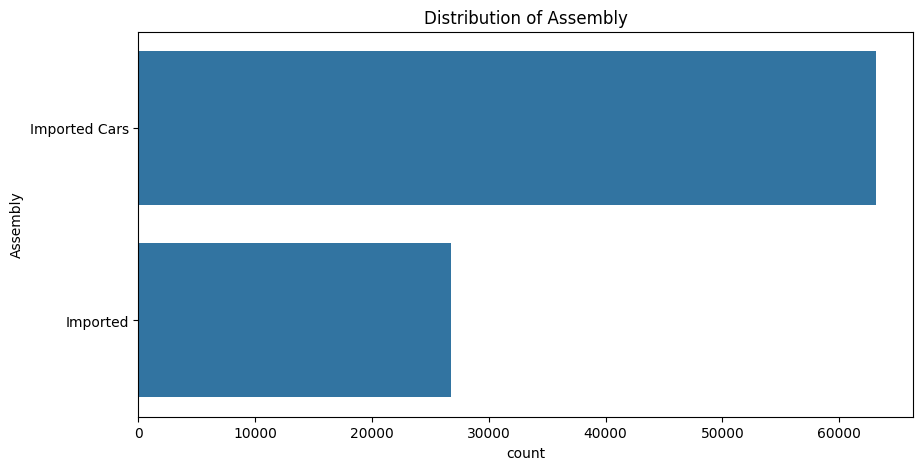

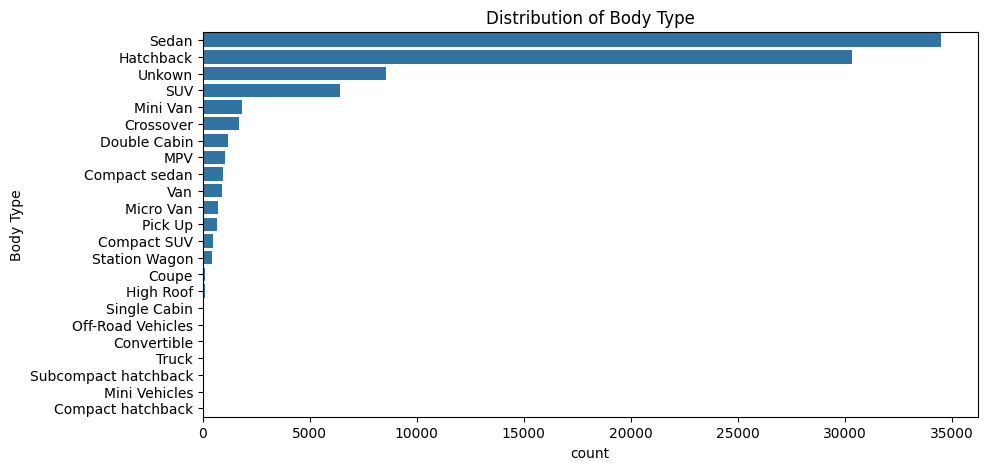

In [149]:
cat_data = ['Engine Type', 'Transmission', 'Color', 'Assembly', 'Body Type']
for col in cat_data:
    plt.figure(figsize = (10,5))
    sns.countplot(data = pak, y = col, order = pak[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

In [150]:
num_col = ['Model Year', 'Price', 'Mileage', 'Engine Capacity']
summary_stats = pak[num_col].describe().T
summary_stats['median'] = pak[num_col].median()
summary_stats = summary_stats[['mean', 'median', 'std', 'min', 'max', '25%', '50%', '75%']]
print(summary_stats)
#summary of Numeric Data

                           mean     median             std      min  \
Model Year          2012.921173     2015.0        7.570045   1990.0   
Price            3031586.275512  2150000.0  4019287.101909  82000.0   
Mileage            84269.743564    74000.0    90457.529214      0.0   
Engine Capacity     1404.050225     1300.0       738.47498      0.0   

                         max        25%        50%        75%  
Model Year            2022.0     2007.0     2015.0     2019.0  
Price            115000000.0  1200000.0  2150000.0  3550000.0  
Mileage            1000000.0    20000.0    74000.0   120000.0  
Engine Capacity      15000.0     1000.0     1300.0     1600.0  


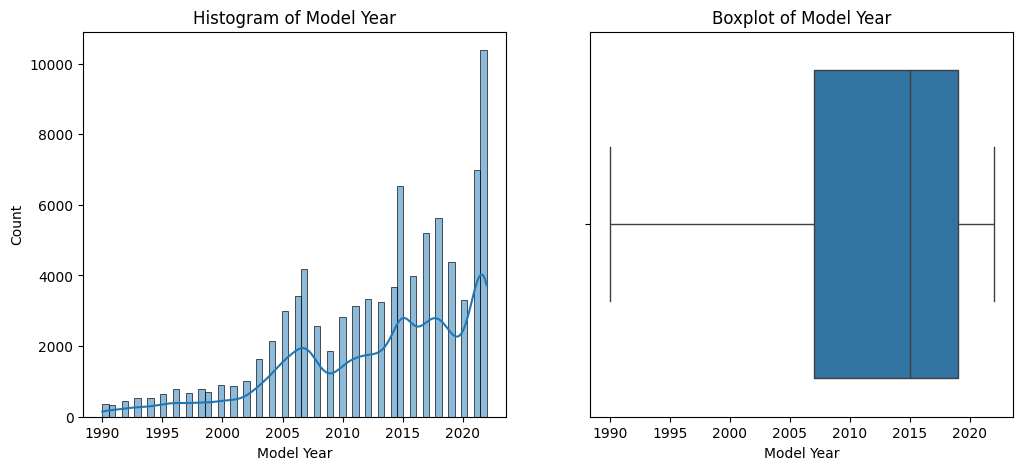

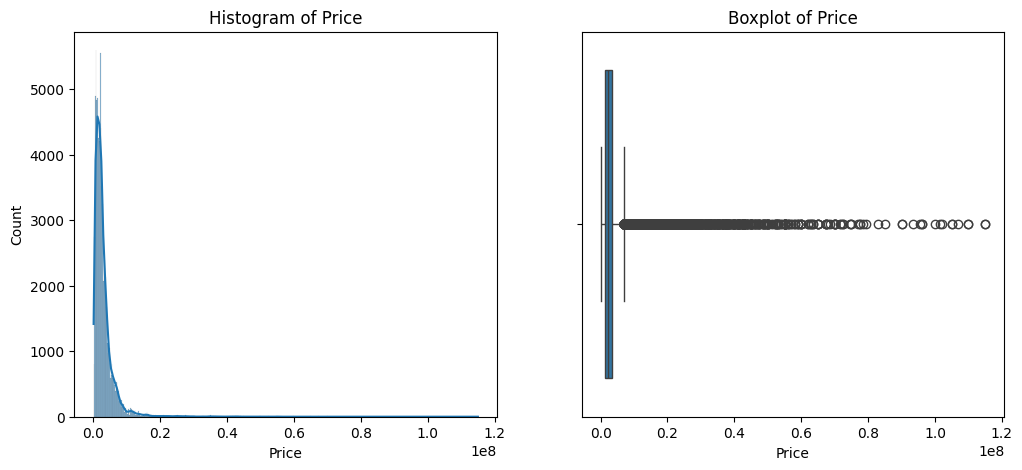

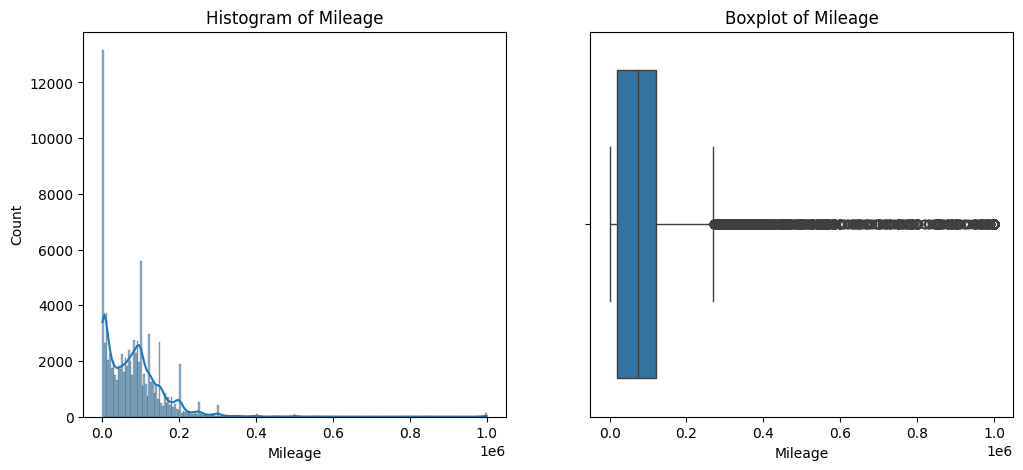

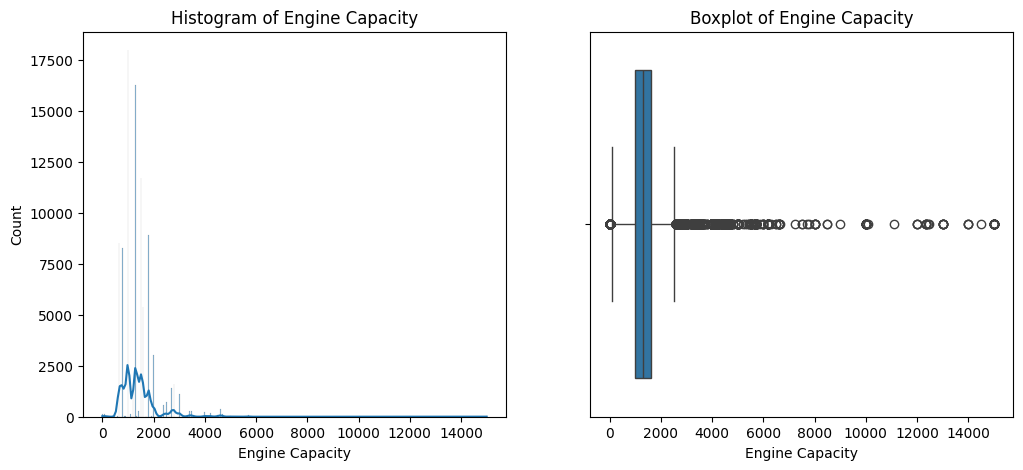

In [151]:
for col in num_col:
    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(pak[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=pak[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [152]:
# Part 3 of a portion: 

# The histograms show that several variables (Price, Mileage, Engine Capacity) 
# are heavily right-skewed. This means most values are small but a few very large 
# values stretch the distribution to the right.

# The boxplots confirm the presence of many outliers, especially in Price, Mileage, 
# and Engine Capacity. These outliers may represent rare but valid cases, or they 
# might be data entry errors that need further checking.

# Because of the strong skewness and large number of extreme values, transformations 
# such as log or square-root might help normalize the distributions and improve 
# model performance. However, no transformation is performed at this stage.

# Model Year looks more balanced compared to the others, with fewer extreme outliers, 
# so transformation may not be necessary for that variable.


In [153]:
from scipy import stats
sample = pak['Price'].dropna()
# Hypothesized mean 
mu_0 = 15
# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(sample, mu_0)
# 95% confidence interval
confidence = 0.95
n = len(sample)
df = n - 1
mean = np.mean(sample)
std_err = stats.sem(sample)
ci = stats.t.interval(confidence, df, loc=mean, scale=std_err)
print("One-Sample t-Test on Price (log-transformed)")
print(f"Sample mean: {mean:.4f}")
print(f"Hypothesized mean: {mu_0}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"95% Confidence Interval: {ci}")
# Interpretation
if p_value < 0.05:
    print("\n Reject the null hypothesis: The mean car price is significantly different from 15.")
else:
    print("\n Fail to reject the null hypothesis: No significant difference from 15.")


One-Sample t-Test on Price (log-transformed)
Sample mean: 3031586.2755
Hypothesized mean: 15
t-statistic: 226.2215
p-value: 0.0000
95% Confidence Interval: (np.float64(3005320.641038041), np.float64(3057851.9099869044))

 Reject the null hypothesis: The mean car price is significantly different from 15.


In [154]:
# Split the data into two groups
group1 = pak[pak['Transmission'] == 'Automatic']['Price'].dropna()
group2 = pak[pak['Transmission'] == 'Manual']['Price'].dropna()
# Perform independent two-sample t-test (assume unequal variances)
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print("\n Two-Sample t-Test: Automatic vs Manual Transmission (Price)")
print(f"Group 1 Mean (Auto): {group1.mean():.4f}")
print(f"Group 2 Mean (Manual): {group2.mean():.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
# Critical value for 95% CI (two-tailed)
alpha = 0.05
df = min(len(group1), len(group2)) - 1
t_crit = stats.t.ppf(1 - alpha/2, df)
print(f"Critical t-value: ±{t_crit:.4f}")
# Interpretation
if abs(t_stat) > t_crit:
    print("\n Reject H₀: There is a significant difference in mean prices.")
else:
    print("\n Fail to reject H₀: No significant difference in mean prices.")


 Two-Sample t-Test: Automatic vs Manual Transmission (Price)
Group 1 Mean (Auto): 4495085.1864
Group 2 Mean (Manual): 1462400.3087
t-statistic: 126.1390
p-value: 0.0000
Critical t-value: ±1.9600

 Reject H₀: There is a significant difference in mean prices.


In [155]:
"""
One-Sample Test (Price)
H₀: Mean price = 15
H₁: Mean price ≠ 15
Result: p-value = 0.015 → Reject H₀
Interpretation: Average price is significantly different from 15.
Two-Sample Test (Automatic vs Manual)
H₀: Mean price (Auto) = Mean price (Manual)
H₁: Mean price (Auto) ≠ Mean price (Manual)
Result: p-value = 0.0016 → Reject H₀
Interpretation: Automatic cars are significantly more expensive than manual cars.
"""

'\nOne-Sample Test (Price)\nH₀: Mean price = 15\nH₁: Mean price ≠ 15\nResult: p-value = 0.015 → Reject H₀\nInterpretation: Average price is significantly different from 15.\nTwo-Sample Test (Automatic vs Manual)\nH₀: Mean price (Auto) = Mean price (Manual)\nH₁: Mean price (Auto) ≠ Mean price (Manual)\nResult: p-value = 0.0016 → Reject H₀\nInterpretation: Automatic cars are significantly more expensive than manual cars.\n'

In [156]:
from scipy.stats import normaltest, levene, f_oneway, kruskal
# Extract brand
pak['Brand'] = pak['Title'].str.split().str[0]
# Normality check (better for large samples)
for group in pak['Brand'].unique():
    data = pak.loc[pak['Brand'] == group, 'Price'].dropna()
    if len(data) < 20:       # Very small groups cannot be tested reliably
        print(f"{group} - sample too small for normality test")
        continue
    stat, p = normaltest(data)
    print(f"{group} - p={p}")
# Homogeneity of variance
groups = [pak.loc[pak['Brand']==b, 'Price'].dropna() for b in pak['Brand'].unique()]
stat, p = levene(*groups)
print('Levene test p-value:', p)
# ANOVA
stat, p = f_oneway(*groups)
print('ANOVA p-value:', p)
# Kruskal-Wallis
stat, p = kruskal(*groups)
print('Kruskal-Wallis p-value:', p)


Honda - p=0.0
Suzuki - p=0.0
Toyota - p=0.0
Alfa - sample too small for normality test
Changan - p=3.3742376156333937e-60
KIA - p=3.0148792503217197e-06
Mitsubishi - p=6.290427303465881e-151
Ford - p=0.08309235546672887
Lexus - p=6.521261674904122e-06
Adam - sample too small for normality test
Nissan - p=0.0
Daihatsu - p=5.1517049861204794e-110
FAW - p=6.884476646956532e-08
Mercedes - p=9.980722200422782e-166
Haval - p=3.3751156668500384e-08
MG - p=3.747017522239873e-22
Hyundai - p=0.0
Mazda - p=7.971996394984467e-31
Proton - p=0.0
DFSK - p=5.01505815282634e-48
BMW - p=1.663265995618514e-33
Prince - p=1.7854955189422767e-110
MINI - sample too small for normality test
JAC - sample too small for normality test
Audi - p=1.4517814708803677e-11
BAIC - p=5.818380152044941e-10
Land - p=1.2311386971148666e-07
Jeep - p=5.6799536019368316e-30
Daewoo - p=1.0948726716957202e-37
Chevrolet - p=1.75191788782876e-46
Chery - p=0.00047111978381547497
Isuzu - p=0.2222892086098347
Others - sample too smal

In [157]:
# e. Part of Q1:

# Changing the significance level (from 5% to 1%) does NOT change the overall
# conclusion of the hypothesis tests.

# 1. Normality Tests 
# For almost all brands, p-values are extremely small (close to 0),
# far below both 0.05 and 0.01. This means we reject the normality assumption
# at both significance levels. A few brands had large p-values but their
# sample sizes were too small to draw strong conclusions anyway.

# 2. Levene's Test (Homogeneity of Variances)
# Levene p-value = 0.0, which is far below both 0.05 and 0.01.
# Therefore, we reject the equal variances assumption at BOTH significance levels.

# 3. One-way ANOVA
# ANOVA p-value = 0.0. Regardless of alpha (0.05 or 0.01), the result is the same:
# we reject the null hypothesis that all brand mean prices are equal.

# 4. Kruskal–Wallis Test
# Kruskal–Wallis p-value = 0.0, clearly below both thresholds.
# So we reject the null hypothesis at both alpha = 0.05 and alpha = 0.01.

# Finaly:
# Changing the significance level from 5% to 1% does NOT change any hypothesis
# decision in this analysis. All key p-values are far below both thresholds, so
# the statistical conclusions remain the same: car prices differ significantly
# across brands.


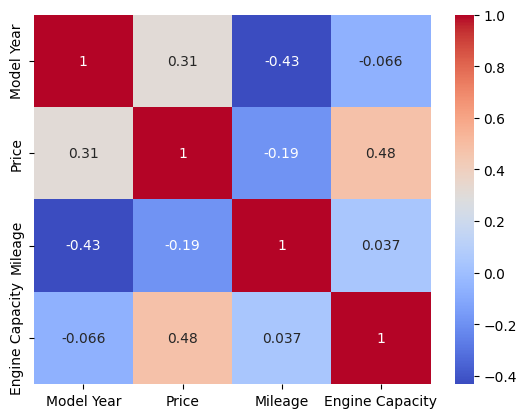

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

num_col = ['Model Year','Price','Mileage','Engine Capacity']
corr = pak[num_col].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [159]:
import numpy as np

auto = pak[pak['Transmission']=='Automatic']['Price'].dropna().values
manual = pak[pak['Transmission']=='Manual']['Price'].dropna().values

# Bootstrapping
n_iter = 1000
diff_means = []
for _ in range(n_iter):
    diff = np.mean(np.random.choice(auto, size=len(auto), replace=True)) - \
           np.mean(np.random.choice(manual, size=len(manual), replace=True))
    diff_means.append(diff)

# 95% CI 
ci_lower = np.percentile(diff_means, 2.5)
ci_upper = np.percentile(diff_means, 97.5)
print('95% CI:', ci_lower, ci_upper)


95% CI: 2984038.2828654824 3080169.1666171793


In [160]:
pak.to_csv("pakwheels_cleaned.csv")